###**Import Modules**

In [26]:
# Import Dependencies
import pandas as pd
import numpy as np

%pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier


from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
%pip install imblearn
from imblearn.over_sampling import RandomOverSampler

### **Upload File**

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Import our Kaggle train Data Set
train_df = pd.read_csv('/content/drive/MyDrive/CodeAlpha Data Analysis Internship/Titanic Classification Dataset/train.csv')

### **Data Cleaning**

In [29]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
# Fill our mising values for "Age" and "Embarked"
age_mean = train_df['Age'].mean()
train_df['Age'].fillna(age_mean, inplace=True)

embarked_mode = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(embarked_mode, inplace=True)

In [32]:
# Converting all columns to the right data type

# Convert 'Embarked' to category
train_df['Embarked'] = train_df['Embarked'].astype('category')

# Convert 'Sex' to category
train_df['Sex'] = train_df['Sex'].astype('category')

# Check the data types of the columns after conversion
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB
None


In [33]:
# drop passengerID, name, Ticket and cabin
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [34]:
# change Pclass to ticket_class

train_df.rename(columns={'Pclass': 'ticket_class'}, inplace=True)

In [35]:
# Combine 'SibSp' and 'Parch'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1


# Drop 'SibSp', and 'Parch'
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

### **Insights**

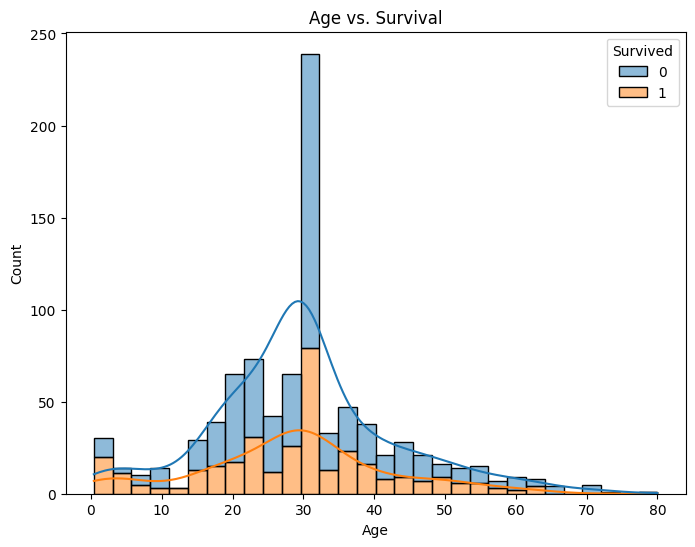

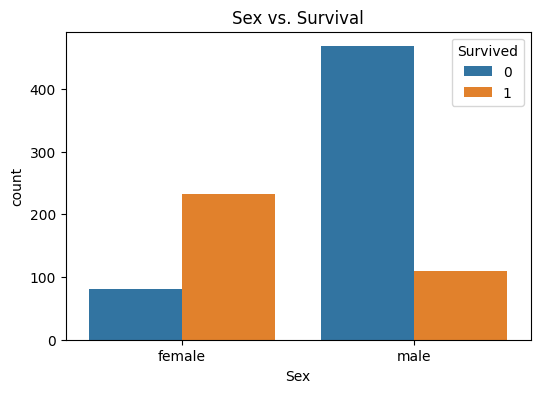

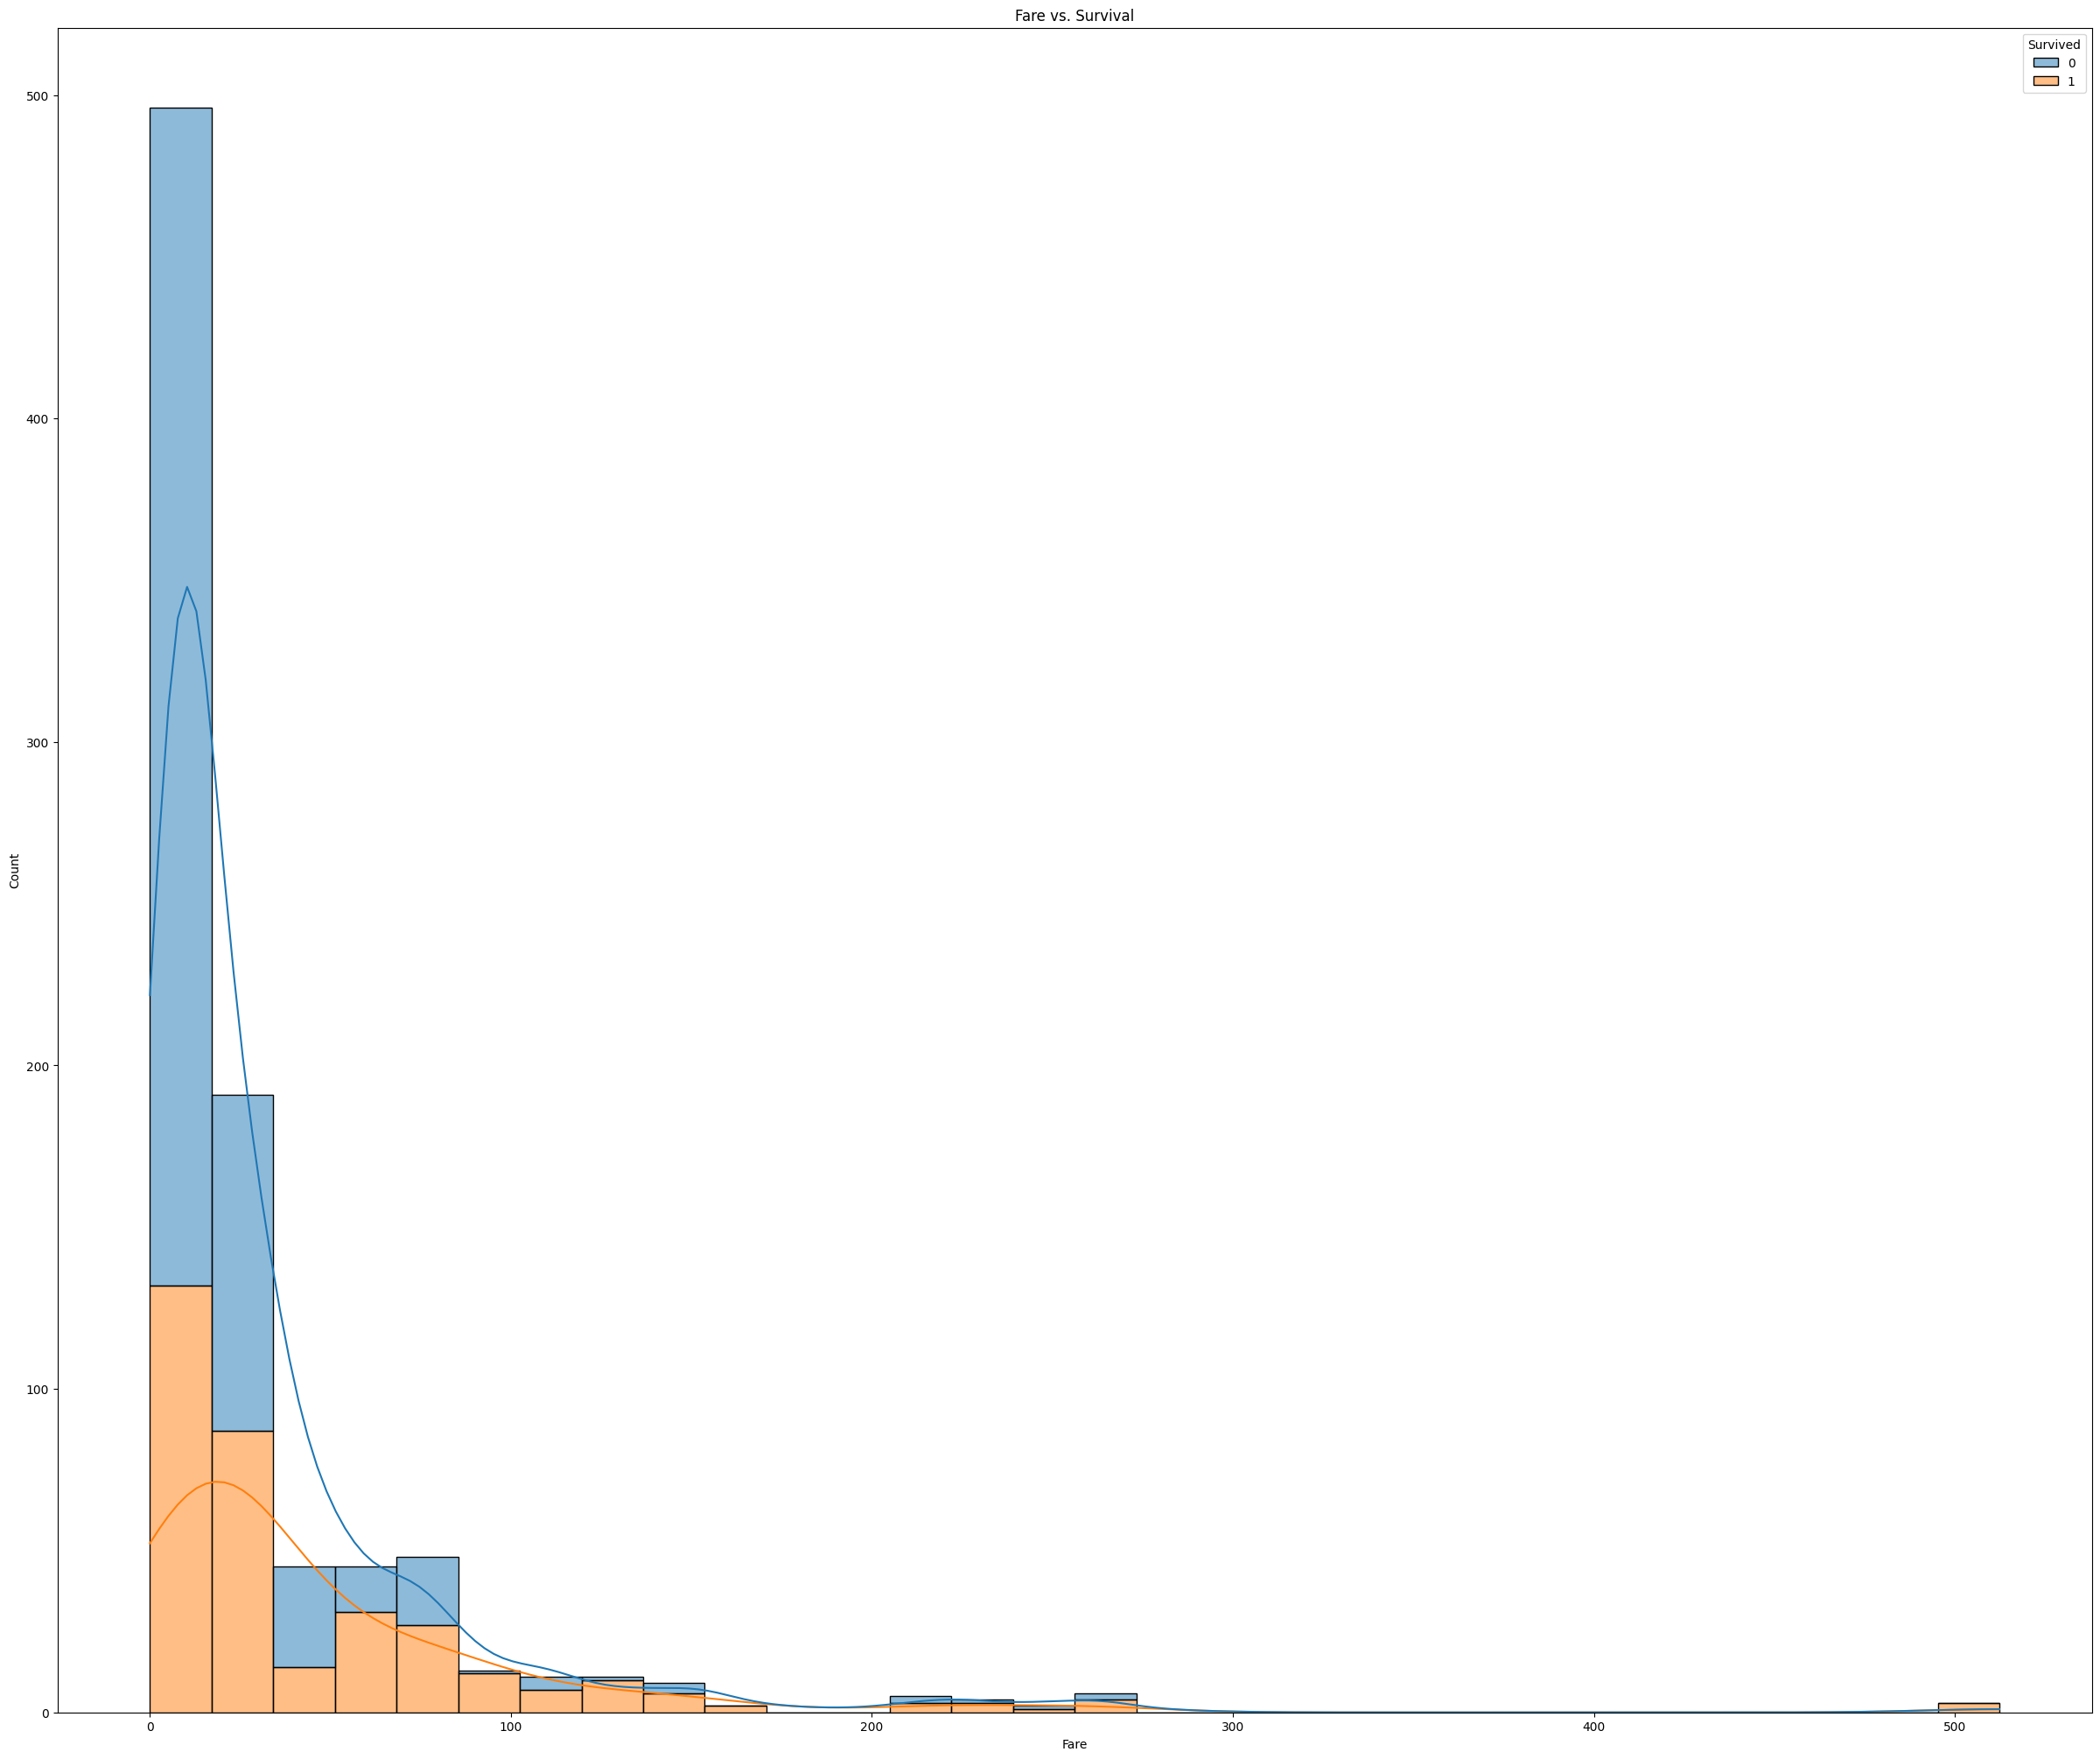

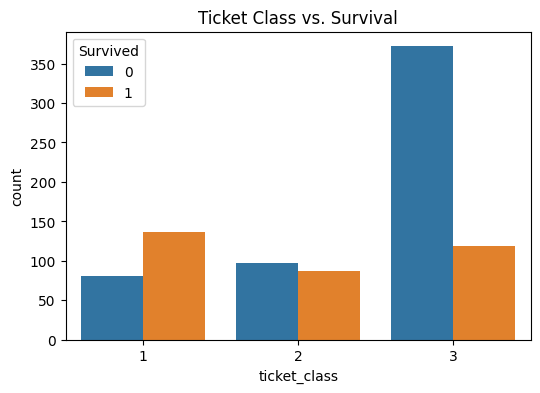

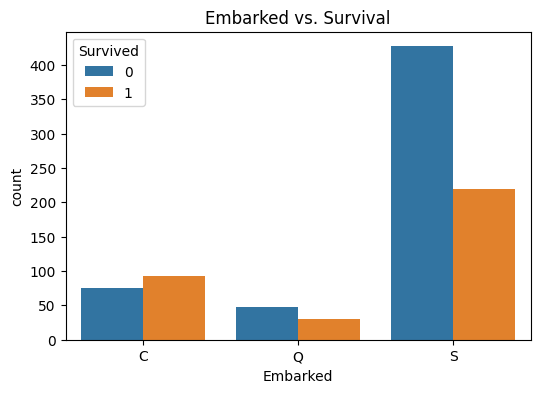

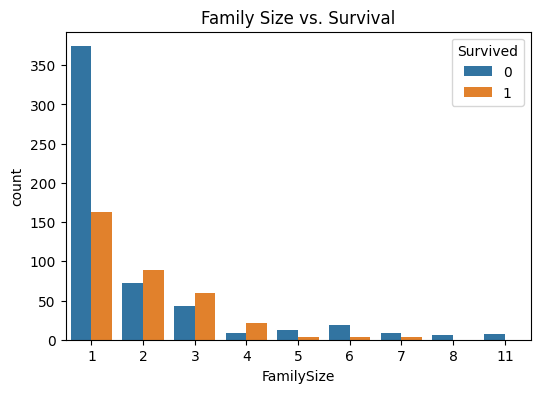

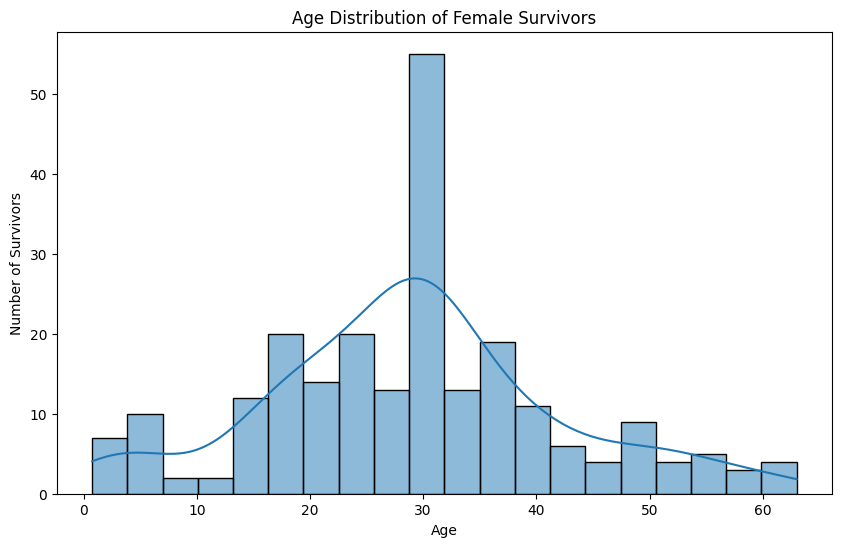

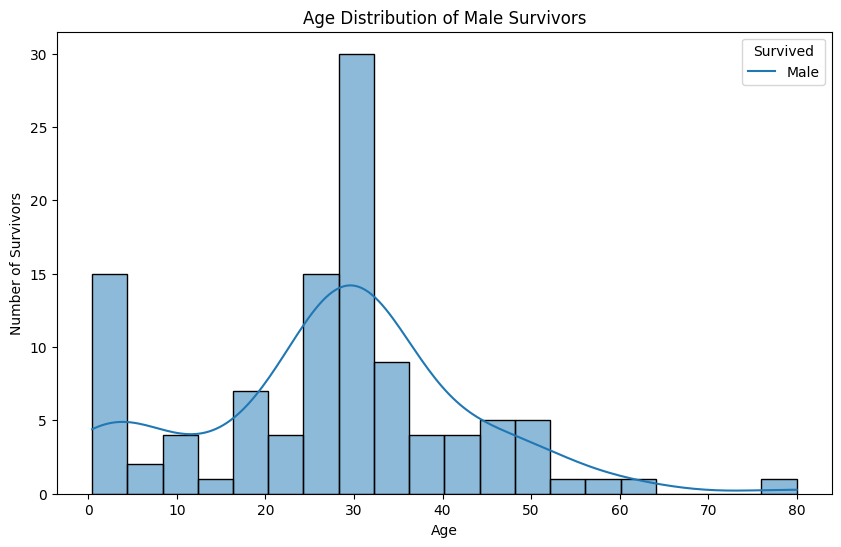

In [36]:
### **Insights**
# Analyze Age vs Survived

plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, multiple="stack") # Changed df to train_df
plt.title('Age vs. Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Analyze Gender vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train_df) # Changed df to train_df
plt.title('Sex vs. Survival')
plt.show()


# Analyze Fare_Category vs Survived
plt.figure(figsize=(30, 25))
sns.histplot(data=train_df, x='Fare', hue='Survived', kde=True, bins=30, multiple="stack") # Changed df to train_df
plt.title('Fare vs. Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# Analyze Pclass vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='ticket_class', hue='Survived', data=train_df) # Changed df to train_df
plt.title('Ticket Class vs. Survival')
plt.show()

# Analyze Embarked vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train_df) # Changed df to train_df
plt.title('Embarked vs. Survival')
plt.show()


# Analyze Family Category Size vs Survived
plt.figure(figsize=(6, 4))
sns.countplot(x='FamilySize', hue='Survived', data=train_df) # Changed df to train_df
plt.title('Family Size vs. Survival')
plt.show()


# Filter for female survivors
female_survivors = train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == 1)] # Changed df to train_df

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(female_survivors['Age'], kde=True, bins=20)
plt.title('Age Distribution of Female Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.show()

# Filter for male survivors
male_survivors = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == 1)] # Changed df to train_df

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(male_survivors['Age'], kde=True, bins=20)
plt.title('Age Distribution of Male Survivors')
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.legend(title='Survived', labels=['Male']) # Added legend
plt.show()

### **Summary Statistics**

In [37]:
train_df.describe()

,Survived,ticket_class,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602
std,0.486592,0.836071,13.002015,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000
50%,0.000000,3.000000,29.699118,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


In [38]:
# Mode Values
train_df.mode()

,Survived,ticket_class,Sex,Age,Fare,Embarked,FamilySize
0,0,3,male,29.699118,8.05,S,1


In [39]:
# Median values
train_df.median(numeric_only=True)

,0
Survived,0.000000
ticket_class,3.000000
Age,29.699118
Fare,14.454200
FamilySize,1.000000


## **Data Preprocessing**

### **Encoding**

In [40]:
# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the 'Embarked' and 'Sex' columns
encoded_features = enc.fit_transform(train_df[['Embarked', 'Sex']])

# Create a DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=enc.get_feature_names_out(['Embarked', 'Sex']))

# Drop the original 'Embarked' and 'Sex' columns from train_df
dropped_df = train_df.drop(['Embarked', 'Sex'], axis=1)

# Concatenate the encoded DataFrame with train_df
one_hot_encoded__df = pd.concat([dropped_df, encoded_df], axis=1)

### **Feature Scaling**

In [41]:


from sklearn.preprocessing import StandardScaler

# Assuming df_processed is your DataFrame
# Separate features (X) and target (y)
X = one_hot_encoded__df.drop('Survived', axis=1)
y = one_hot_encoded__df['Survived']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Concatenate the scaled features and the target variable
df_scaled = pd.concat([X_scaled_df, y], axis=1)

# Now df_scaled contains your scaled data
df_scaled.head()

,ticket_class,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived
0,0.827377,-0.592481,-0.502445,0.059160,-0.482043,-0.307562,0.615838,-0.737695,0.737695,0
1,-1.566107,0.638789,0.786845,0.059160,2.074505,-0.307562,-1.623803,1.355574,-1.355574,1
2,0.827377,-0.284663,-0.488854,-0.560975,-0.482043,-0.307562,0.615838,1.355574,-1.355574,1
3,-1.566107,0.407926,0.420730,0.059160,-0.482043,-0.307562,0.615838,1.355574,-1.355574,1
4,0.827377,0.407926,-0.486337,-0.560975,-0.482043,-0.307562,0.615838,-0.737695,0.737695,0


In [42]:
df_scaled

,ticket_class,Age,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Survived
0,0.827377,-0.592481,-0.502445,0.059160,-0.482043,-0.307562,0.615838,-0.737695,0.737695,0
1,-1.566107,0.638789,0.786845,0.059160,2.074505,-0.307562,-1.623803,1.355574,-1.355574,1
2,0.827377,-0.284663,-0.488854,-0.560975,-0.482043,-0.307562,0.615838,1.355574,-1.355574,1
3,-1.566107,0.407926,0.420730,0.059160,-0.482043,-0.307562,0.615838,1.355574,-1.355574,1
4,0.827377,0.407926,-0.486337,-0.560975,-0.482043,-0.307562,0.615838,-0.737695,0.737695,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.386671,-0.560975,-0.482043,-0.307562,0.615838,-0.737695,0.737695,0
887,-1.566107,-0.823344,-0.044381,-0.560975,-0.482043,-0.307562,0.615838,1.355574,-1.355574,1
888,0.827377,0.000000,-0.176263,1.299429,-0.482043,-0.307562,0.615838,1.355574,-1.355574,0
889,-1.566107,-0.284663,-0.044381,-0.560975,2.074505,-0.307562,-1.623803,-0.737695,0.737695,1


### **Predictors and Target Variables**

In [43]:
# Separate the features (predictors) from the target variable (Attrition)
X = df_scaled.drop(['Survived'], axis=1)
y = df_scaled['Survived']

### **Training and Test Data Split**

In [44]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from your previous code
# X = df_processed.drop(['Survived'], axis=1)
# y = df_processed['Survived']

# Split data into training and remaining sets (60% train, 20% remaining)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Split the remaining data into validation and test sets (50% validation, 50% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

#### **Solving Training Data Imbalance**

In [45]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Oversample the minority class ('1') to match the majority class ('0')
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

# Print the value counts of the resampled target variable
print(y_train_resample.value_counts())

# Oversample the minority class ('1') to match the majority class ('0')
X_valid_resample, y_valid_resample = smote.fit_resample(X_valid, y_valid)

# Print the value counts of the resampled target variable
print(y_valid_resample.value_counts())

# Oversample the minority class ('1') to match the majority class ('0')
X_test_resample, y_test_resample = smote.fit_resample(X_test, y_test)

# Print the value counts of the resampled target variable
print(y_test_resample.value_counts())

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Survived
1    333
0    333
Name: count, dtype: int64
Survived
1    134
0    134
Name: count, dtype: int64
Survived
0    82
1    82
Name: count, dtype: int64
X_train shape: (534, 9)
y_train shape: (534,)
X_valid shape: (221, 9)
y_valid shape: (221,)
X_test shape: (136, 9)
y_test shape: (136,)


## **Performance Evaluation**

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Create an empty list to store the results
results = []

# Assuming you have already defined and trained your models (as in the previous code)
# and have the model names stored in the 'models' dictionary.  Also, assuming X_test and y_test are available.

model_names = ["Logistic Regression", "SVC", "Decision Tree", "K-Nearest Neighbors", "Gaussian Naive Bayes", "XGBoost", "Random Forest", "AdaBoost", "Gradient Boosting", "Extra Trees"]

for model_name in model_names:
    # Replace this with your actual model loading code
    if model_name == "Logistic Regression":
      # Use the correct class name to create a new instance
      model = LogisticRegression()
    elif model_name == "SVC":
      model = SVC()
    elif model_name == "Decision Tree":
      model = DecisionTreeClassifier()
    elif model_name == "K-Nearest Neighbors":
      model = KNeighborsClassifier()
    elif model_name == "Gaussian Naive Bayes":
      model = GaussianNB()
    elif model_name == "XGBoost":
      model = XGBClassifier()
    elif model_name == "Random Forest":
      model = RandomForestClassifier()
    elif model_name == "AdaBoost":
      model = AdaBoostClassifier()
    elif model_name == "Gradient Boosting":
      model = GradientBoostingClassifier()
    elif model_name == "Extra Trees":
      model = ExtraTreesClassifier()

    model.fit(X_train_resample, y_train_resample)
    # Predict on validation set
    y_pred_val = model.predict(X_valid_resample)
    predictions = model.predict(X_test_resample)

    # Calculate the metrics
    accuracy = accuracy_score(y_test_resample, predictions)
    precision = precision_score(y_test_resample, predictions)
    recall = recall_score(y_test_resample, predictions)
    f1 = f1_score(y_test_resample, predictions)

    # Append the results to the list
    results.append([model_name, accuracy, precision, recall, f1])

# Create a Pandas DataFrame from the results list
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Display the DataFrame
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.817073,0.833333,0.792683,0.812500
1,SVC,0.804878,0.857143,0.731707,0.789474
2,Decision Tree,0.768293,0.789474,0.731707,0.759494
3,K-Nearest Neighbors,0.762195,0.794521,0.707317,0.748387
4,Gaussian Naive Bayes,0.792683,0.815789,0.756098,0.784810
5,XGBoost,0.792683,0.785714,0.804878,0.795181
6,Random Forest,0.810976,0.822785,0.792683,0.807453
7,AdaBoost,0.786585,0.805195,0.756098,0.779874
8,Gradient Boosting,0.829268,0.864865,0.780488,0.820513
9,Extra Trees,0.804878,0.812500,0.792683,0.802469
